In [66]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

tf.__version__

'2.20.0'

# Redes neurais convolucionais para classificação de imagens

##  Base de treinamento e teste

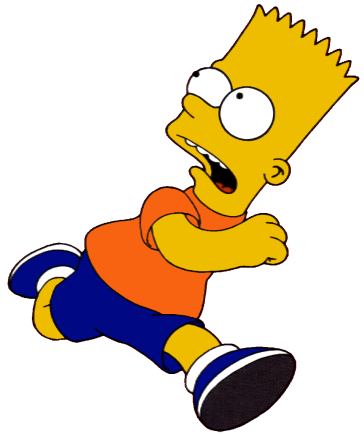

In [6]:
tf.keras.preprocessing.image.load_img('./homer_bart_2/training_set/bart/bart100.bmp')

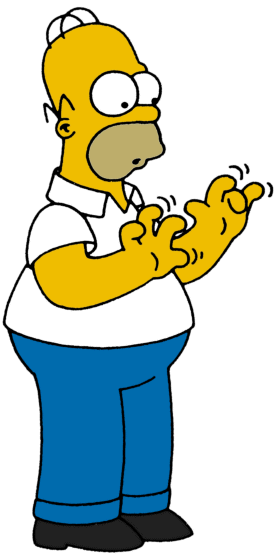

In [7]:
tf.keras.preprocessing.image.load_img('./homer_bart_2/training_set/homer/homer100.bmp')

## Bases de treinamento e teste

In [8]:
gerador_treinamento = ImageDataGenerator(rescale=1. / 255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2,
                                         )

In [9]:
dataset_treinamento = gerador_treinamento.flow_from_directory('./homer_bart_2/training_set',
                                                              target_size=(64, 64),
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              shuffle=True)

Found 215 images belonging to 2 classes.


In [10]:
dataset_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
dataset_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [12]:
gerador_teste = ImageDataGenerator(rescale=1. / 255)

In [13]:
dataset_teste = gerador_teste.flow_from_directory(
    './homer_bart_2/test_set',
    target_size=(64, 64),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

Found 54 images belonging to 2 classes.


In [14]:
dataset_treinamento.class_indices


{'bart': 0, 'homer': 1}

## Construção e treinamento da rede neural

In [18]:
network = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=577, activation='relu'),
    Dense(units=577, activation='relu'),
    Dense(units=2, activation='softmax'),
])

network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 577)            │       665,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │         1,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
historico = network.fit(dataset_treinamento, epochs=50, verbose=0)

In [21]:
historico.history.keys()

dict_keys(['accuracy', 'loss'])

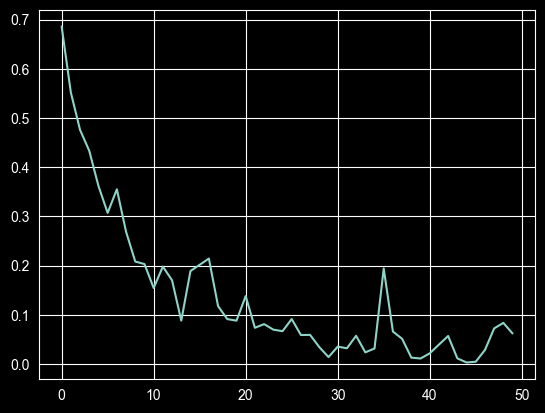

In [22]:
plt.plot(historico.history['loss'])

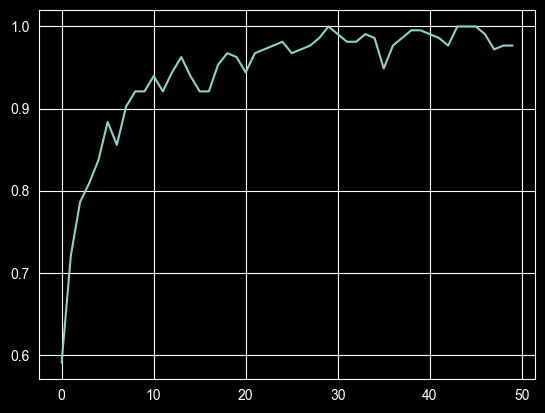

In [24]:
plt.plot(historico.history['accuracy'])

## Avaliação da Rede Neural


In [26]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [25]:
previsoes = network.predict(dataset_teste)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
previsoes

array([[1.0000000e+00, 1.3488096e-20],
       [1.0000000e+00, 1.2276651e-08],
       [9.3286578e-03, 9.9067140e-01],
       [1.0000000e+00, 5.9751074e-29],
       [1.0000000e+00, 1.0890382e-26],
       [1.0000000e+00, 4.1565761e-20],
       [1.0000000e+00, 3.7979372e-14],
       [9.9974853e-01, 2.5149542e-04],
       [8.7916702e-01, 1.2083301e-01],
       [9.9204612e-01, 7.9538403e-03],
       [9.9981135e-01, 1.8867511e-04],
       [1.0000000e+00, 6.1916086e-18],
       [8.7755650e-01, 1.2244351e-01],
       [9.9999774e-01, 2.2935426e-06],
       [9.9686533e-01, 3.1346867e-03],
       [9.9999928e-01, 7.3755007e-07],
       [3.9661527e-03, 9.9603385e-01],
       [1.0000000e+00, 1.7458446e-10],
       [3.2120494e-03, 9.9678802e-01],
       [1.0000000e+00, 4.2451168e-32],
       [3.6461940e-01, 6.3538063e-01],
       [1.0000000e+00, 2.3206111e-24],
       [9.9999952e-01, 5.1206899e-07],
       [2.4338565e-03, 9.9756622e-01],
       [9.7817238e-03, 9.9021822e-01],
       [1.0000000e+00, 1.

In [28]:
previsoes = np.argmax(previsoes, axis=1)
previsoes

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [31]:
accuracy_score(dataset_teste.classes, previsoes)

0.8703703703703703

<Axes: >

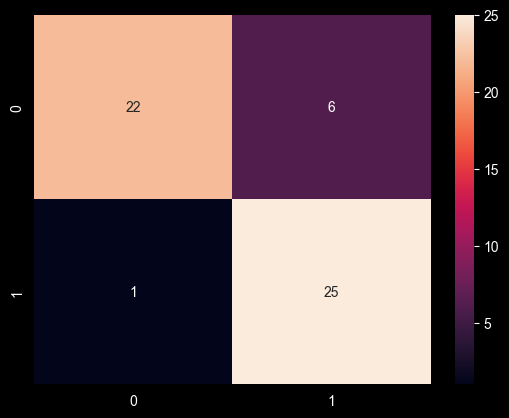

In [35]:
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.81      0.96      0.88        26

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54



## Salvar e carregar a rede neural

In [36]:
network.save('network.keras')

In [38]:
network_loaded = tf.keras.models.load_model('network.keras')
network_loaded.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
network_loaded.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 577)            │       665,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │         1,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

## Classificação de uma única imagem

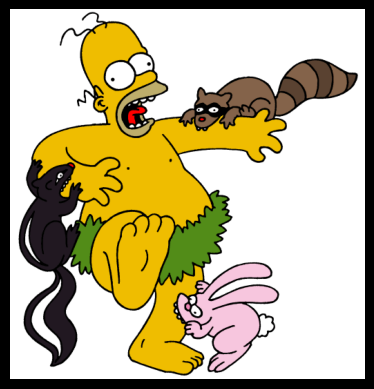

In [51]:
imagem = cv2.imread('./homer_bart_2/test_set/homer/homer15.bmp')
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [52]:
imagem.shape

(536, 514, 3)

In [53]:
imagem = cv2.resize(imagem, (64, 64))

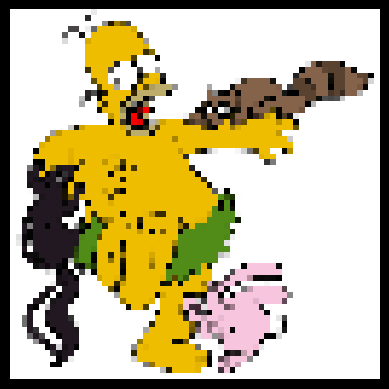

In [54]:
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [55]:
imagem

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [56]:
imagem = imagem / 255

In [57]:
imagem.shape

(64, 64, 3)

In [59]:
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [61]:
previsao = network_loaded.predict(imagem)
previsao

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.19283512, 0.8071649 ]], dtype=float32)

In [62]:
previsao = np.argmax(previsao)
previsao

np.int64(1)

In [64]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [65]:
if previsao == 0:
    print('Bart')
else:
    print('Homer')

Homer
